In [33]:
import math
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import random

plt.rcParams['figure.figsize'] = [10, 5]

In [34]:
class spring:
    def __init__(self, a, b, length):
        self.a = a #1st end point
        self.b = b #2nd end point
        self.length = length
    
    def __str__(self):
        return "({}, {}, {:.3})".format(self.a, self.b, self.length)

In [35]:
class vector:
    def __init__(self, x = 0, y = 0, z = 0):
        self.x = x
        self.y = y
        self.z = z
        
    def __str__(self):
        return "({:.3f}, {:.3f}, {:.3f})".format(self.x, self.y, self.z)
    
    def multiply(self, c):
        return vector(self.x * c, self.y * c, self.z * c)
    
    def divide(self, c):
        return vector(self.x / c, self.y / c, self.z * c)
    
    def add(self, v):
        return vector(self.x + v.x, self.y + v.y, self.z + v.z)
    
    def sub(self, v):
        return vector(self.x - v.x, self.y- v.y, self.z - v.z)
    
    def length(self):
        return math.sqrt(self.x ** 2 + self.y ** 2 + self.z ** 2)
    
    def distance(self, v):
        return math.sqrt((self.x - v.x) ** 2 + (self.y - v.y) ** 2 + (self.z - v.z) ** 2)

In [61]:
class polygon:
    def __init__(self, points, force = vector()):
        self.points = points
        self.n = len(points)
        self.forces = []
        self.springs = []
        for i in range(self.n):
            self.forces.append(force)
            for j in range(i + 1, self.n):
                self.springs.append(spring(i, j, self.points[i].distance(self.points[j])))
                
    def __str__(self):
        point = "{}".format(self.points[0])
        force = "{}".format(self.forces[0])
        spring = "{}".format(self.springs[0])
        for i in range(1, self.n):
            point += ", {}".format(self.points[i])
            force += ", {}".format(self.forces[i])
        for i in range(1, len(self.springs)):
            spring += ", {}".format(self.springs[i])
        return "Points: {}\nForces: {}\nSprings: {}".format(point, force, spring)
    
    def set_points(self, points):
        self.points = points
        
    def set_forces(self, forces):
        self.forces = forces
        
    def update(self):
        p, f = [], []
        p += self.points
        f += self.forces
        #gravity
        for i in range(self.n):
            f[i].z -= 0.05
            
        #springs
        for s in self.springs:
            dist = p[s.a].distance(p[s.b])
            if dist > 0:
                force = p[s.b].sub(p[s.a])
                force = force.divide(force.length())
            else:
                force = vector(random.random(), random.random(), random.random())
            diff = dist - s.length
            #diff = 0.001 * diff ** 4
            #diff = 0.01 * diff ** 2
            force = force.multiply(diff / 100000)
            force = force.multiply(diff)
            if dist < s.length:
                f[s.a] = f[s.a].sub(force)
                f[s.b] = f[s.b].add(force)
            else:
                f[s.a] = f[s.a].add(force)
                f[s.b] = f[s.b].sub(force)
                
        #collision
        for i in range(self.n):
            if p[i].z < 0:
                p[i].z = 0.000001
                f[i] = f[i].multiply(0.9)
                f[i].z *= -1
                
        #force degradation
        for i in range(self.n):
            f[i] = f[i].multiply(0.99)
            
        #move points
        for i in range(self.n):
            p[i] = p[i].add(f[i])
            
        #give back values
        self.set_points(p)
        self.set_forces(f)
       
    #ne tedd, nem éri meg
    def display(self):
        fig = plt.figure()
        ax = Axes3D(fig, auto_add_to_figure=False)
        fig.add_axes(ax)
        x, y, z = [], [], []
        for i in range(self.n):
            x.append(self.points[i].x)
            y.append(self.points[i].y)
            z.append(self.points[i].z)
        verts = [list(zip(x,y,z))]
        ax.add_collection3d(Poly3DCollection(verts))
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Z axis')
        ax.set_xlim3d(0, 200)
        ax.set_ylim3d(0, 800)
        ax.set_zlim3d(0, 200)
        plt.show()
        
    #x tengelyre vetítve
    def save_display_onX(self, num):
        y, z = [], []
        for i in range(self.n):
            if abs(self.points[i].x) < 0.1:
                y.append(self.points[i].y)
                z.append(self.points[i].z)
        plt.fill(y, z)
        #plt.axis('equal')
        plt.xlim(0, 800)
        plt.ylim(0, 400)
        plt.savefig("img_seq\{}.png".format(num))
        plt.clf()
        
    #x tengelyre vetítve
    def display_onX(self):
        y, z = [], []
        for i in range(self.n):
            if abs(self.points[i].x) < 0.1:
                y.append(self.points[i].y)
                z.append(self.points[i].z)
        plt.fill(y, z)
        #plt.axis('equal')
        plt.xlim(0, 800)
        plt.ylim(0, 400)
        plt.show()
        plt.clf()

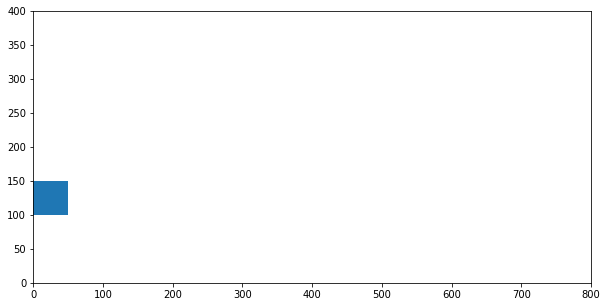

<Figure size 720x360 with 0 Axes>

In [62]:
#test object
p = polygon(points = [vector( 0,  0, 100),
                      vector( 0,  0, 150),
                      vector(50,  0, 150),
                      vector(50, 50, 150),
                      vector( 0, 50, 150),
                      vector( 0, 50, 100),
                      vector(50, 50, 100),
                      vector(50,  0, 100)],
            force = vector(0, 5, 0))
p.display_onX()

In [63]:
p.save_display_onX(0)
for frame in range(1, 150):
    p.update()
    p.save_display_onX(frame)

<Figure size 720x360 with 0 Axes>

In [ ]:
for i in range(60):
    p.update()

In [ ]:
p.update()
#print(p)
p.display()

In [48]:
print(frame)

19
